In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.MNIST(
    root = "data",
    train = True,
    transform = transforms.ToTensor(),
    download=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 508kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.64MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.03MB/s]


In [ ]:
train_data_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)

In [ ]:
# Kiến trúc Convolutional AutoEncoder
class ConvolutionalAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            # Phép biến đổi phi tuyến, giúp mô hình học được các đặc trưng phức tạp
            nn.ReLU(),
            # Giảm kích thước chiều dữ liệu, giữ lại cho model các đặc trưng quan trọng của data
            nn.MaxPool2d(kernel_size = (2, 2), stride=(2, 2)),
            nn.Conv2d(16, 32, 3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(32, 64, 6)
        )


        # Decoder
        self.decoder = nn.Sequential(
            # Mở rộng kích thước của ferature map (bản đồ đặc trưng)
            # Giúp tái tạo dữ liệu từ latent space
            # Input: 1x1x64 (từ encoder) => kernel = 7x7, stride=1 => upsample lên 7x32x32
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            # Upsample từ 7x7x32 => kernel = 3x3 => upsample lên 14x14x16
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            # Upsample từ 14x14x16 => kernel = 3x3 => upsample lên 28x28x1 (kích thước ảnh gốc)
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )


    def forward(self, x):
        encoded_data = self.encoder(x)
        decoded_data = self.decoder(encoded_data)
        return decoded_data

In [ ]:
model = ConvolutionalAutoEncoder().cuda()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
number_of_epochs = 10
results = []
for epoch in range(number_of_epochs):
    for (img, _) in train_data_loader:
        img = Variable(img).cuda()
        reconstructed_image = model(img)
        loss = loss_function(reconstructed_image, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    results.append((epoch, img, reconstructed_image))

Epoch:1, Loss:0.0112
Epoch:2, Loss:0.0077
Epoch:3, Loss:0.0057
Epoch:4, Loss:0.0049
Epoch:5, Loss:0.0042
Epoch:6, Loss:0.0038
Epoch:7, Loss:0.0044
Epoch:8, Loss:0.0041
Epoch:9, Loss:0.0039
Epoch:10, Loss:0.0038


In [ ]:
def plot_result(autoEncoder_result , nbr_epoch):
    original_images = autoEncoder_result[ nbr_epoch -1 ][1].cpu().data.numpy()
    reconstructed_images = autoEncoder_result[ nbr_epoch -1 ][2].cpu().data.numpy()

    # Plot The Original Images
    plt.figure(figsize=(9, 3))
    plt.gray()
    for index, image in zip(range(9) , original_images):
            plt.subplot(2, 9, index+1)
            image = image.reshape(-1, 28,28)
            plt.imshow(image[0])
    plt.suptitle(f"Original Images " , fontsize = 20)

    # Plot The Reconstructed images
    plt.figure(figsize=(9, 3))
    plt.gray()
    for index, image in zip(range(9), reconstructed_images):
        plt.subplot(2, 9, index+1)
        image = image.reshape(-1, 28,28)
        plt.imshow(image[0])
    plt.suptitle(" Reconstructed Images" , fontsize = 20)

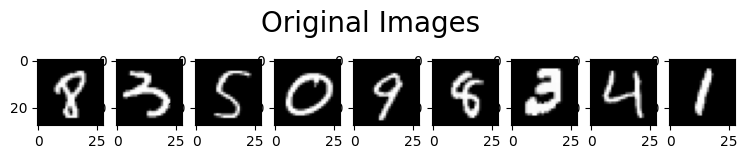

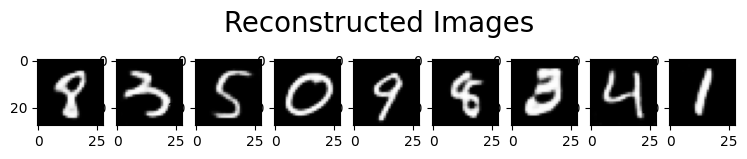

In [ ]:
plot_result(results , number_of_epochs)

In [ ]:
results

[(0,
  tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0.